IMPORTING REQUIRED LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOADING DATASET.

In [2]:
demand = pd.read_csv("demand.csv")

In [3]:
demand.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


CHECKING NULL VALUES.

In [4]:
demand.isnull().sum()


ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [5]:
demand.dtypes

ID               int64
Store ID         int64
Total Price    float64
Base Price     float64
Units Sold       int64
dtype: object

FILLING NULL VALUES WITH MEDAIN.

In [7]:
demand["Total Price"].fillna(demand["Total Price"].median(), inplace = True)

In [8]:
demand.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

ANALYZING RELATIONSHIP BETWEEN DEMAND AND PRICE OF THE PRODUCT USING SCATTER PLOT.

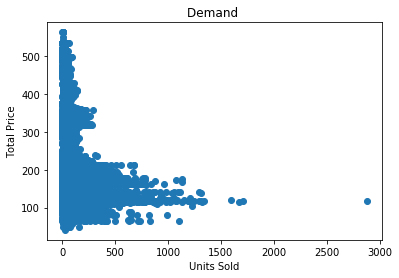

In [14]:
plt.scatter(x = "Units Sold", y = "Total Price", data = demand)
plt.title("Demand ")
plt.xlabel("Units Sold")
plt.ylabel("Total Price")
plt.show()

In [15]:
demand.corr()

,ID,Store ID,Total Price,Base Price,Units Sold
ID,1.000000,0.007464,0.008472,0.018932,-0.010616
Store ID,0.007464,1.000000,-0.038315,-0.038848,-0.004372
Total Price,0.008472,-0.038315,1.000000,0.958867,-0.235624
Base Price,0.018932,-0.038848,0.958867,1.000000,-0.140032
Units Sold,-0.010616,-0.004372,-0.235624,-0.140032,1.000000


CREATING INDEPENDENT AND DEPANDDENT VARIABLES AND PERFORMING TEST TRAIN SPLIT.

In [50]:
X = demand[["Total Price", "Base Price"]]
y = demand[["Units Sold"]]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


USING DECISIONTREE ALGORITHM.

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

PREDICTING NEW RESULT.

In [57]:
features = np.array([[133.00, 140.00]])
dtr.predict(features)

array([27.])